In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS

In [2]:
building_gdf = gpd.read_file("C:/Users/Melis/Desktop/deneme_data/yapilar.shp")

In [3]:
original_crs = building_gdf.crs

target_crs = CRS.from_epsg(32635)  # Change the EPSG code to your desired CRS
building_gdf = building_gdf.to_crs(target_crs)

# Create a new GeoDataFrame with center points of the buildings
building_gdf['center'] = building_gdf['geometry'].centroid
points_gdf = gpd.GeoDataFrame(geometry=building_gdf['geometry'].centroid, crs=building_gdf.crs)

# Now, you can add meters to the buffer distance
buffer_distance_meters = 20  # Adjust this value as needed

# Create a buffer around the center points
building_gdf['buffer'] = building_gdf['center'].buffer(buffer_distance_meters)

mean_distances = {}

for index, building in building_gdf.iterrows():
    center_point = building['center']
    buffer = building['buffer']
    
    # Replace 'points_gdf' with the actual name of your points GeoDataFrame
    points_within_buffer = points_gdf[points_gdf['geometry'].within(buffer)]
    
    # Compute distances to points within the buffer
    distances = points_within_buffer.distance(center_point)
    
    # Exclude distances equal to zero
    distances = distances[distances > 0]
    
    if len(distances) > 0:
        # Calculate the mean distance
        mean_distance = distances.mean()
    else:
        # If there are no non-zero distances, set mean_distance to NaN or any other appropriate value
        mean_distance = float('nan')
    
    # Store the mean distance in the dictionary with the building's ID as the key
    building_id = building['OBJECTID_1']  # Replace 'OBJECTID_1' with your building ID column
    mean_distances[building_id] = mean_distance

# Add a new column 'mean_distance' to the building_gdf
building_gdf['mean_distance'] = building_gdf['OBJECTID_1'].map(mean_distances)

D:\ANACONDO_3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


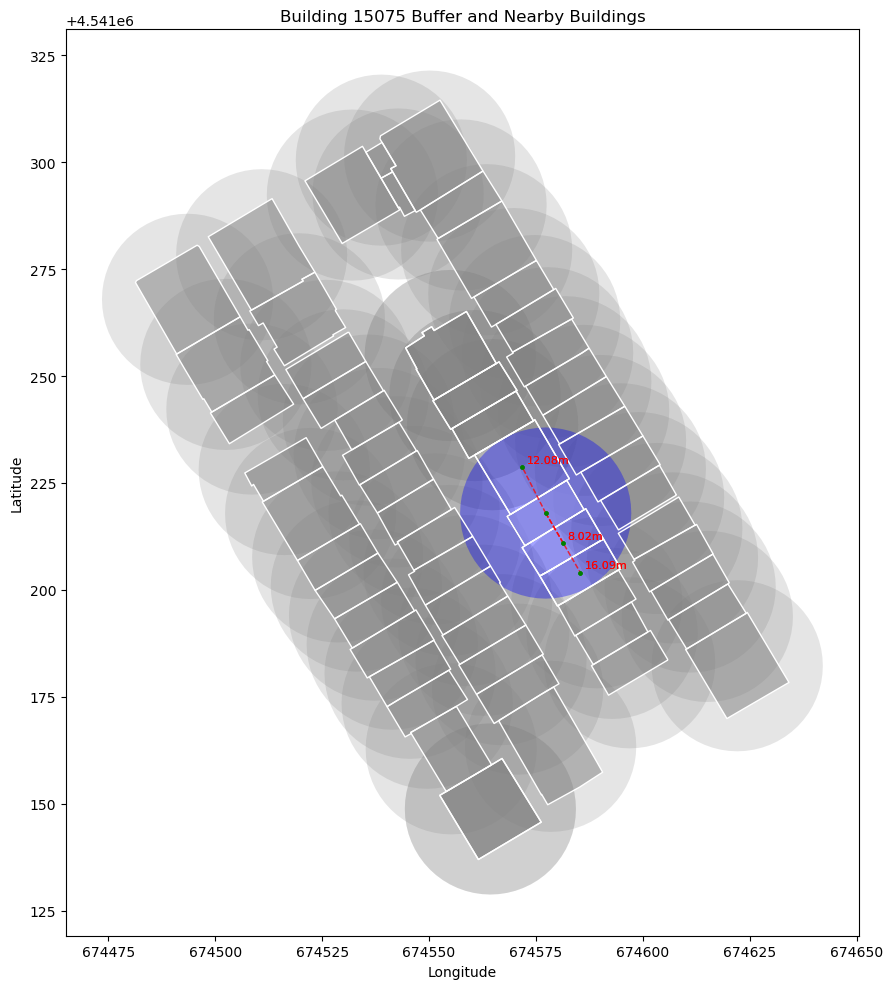

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Örnek veri seti
# building_gdf = gpd.read_file("path_to_your_file.shp")

# İlgilenilen bina ID'sini belirleyin
selected_building_id = 15075  # Örnek bir bina ID'si

# İlgilenilen binayı seçin
selected_building = building_gdf[building_gdf['OBJECTID_1'] == selected_building_id]

# Seçilen binanın buffer'ını oluşturun
buffer_distance_meters = 20  # Örnek bir buffer mesafesi
selected_building['buffer'] = selected_building['center'].buffer(buffer_distance_meters)

# Seçili binanın tampon bölgesi içinde kalan binaları seçin
buffer_polygon = selected_building['buffer'].iloc[0]
nearby_buildings = building_gdf[building_gdf['center'].apply(lambda x: x.within(buffer_polygon))]

# Seçili binanın merkezini ve buffer'ını görselleştirmek için bir altlık oluşturun
fig, ax = plt.subplots(figsize=(10, 10))

# Seçili binayı ve buffer'ını görselleştirin
selected_building.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
building_gdf.boundary.plot(ax=ax, color='white', linewidth=1, alpha=1, zorder=2)
selected_building['buffer'].plot(ax=ax, color='blue', alpha=0.2)

# Buffer'ın içindeki diğer binaların merkezlerini ve bufferlarını görselleştirin
for index, row in nearby_buildings.iterrows():
    if row['OBJECTID_1'] != selected_building_id:  # Seçili binayı atlayın
        center_point = row['center']
        distance = selected_building['center'].iloc[0].distance(center_point)
        
        # Mesafe çizgisini çizin
        ax.plot([selected_building['center'].iloc[0].x, center_point.x], [selected_building['center'].iloc[0].y, center_point.y],
                color='red', linestyle='--', linewidth=1, alpha=0.5)
        
        # Mesafeyi yazın
        ax.annotate(text=f'{distance:.2f}m', xy=(center_point.x, center_point.y), xytext=(3, 3),
                    textcoords="offset points", fontsize=8, color='red')

# Diğer zonun içine giren diğer yapıların merkezlerini ve bufferlarını görselleştirin
other_buildings = building_gdf[~building_gdf['buffer'].apply(lambda buffer: buffer.contains(selected_building['center'].iloc[0]))]
other_buildings.plot(ax=ax, color='gray', alpha=0.5, zorder=0)
other_buildings['buffer'].plot(ax=ax, color='gray', alpha=0.2, zorder=0)

# Buffer'ın içindeki diğer binaların orta noktalarını nokta olarak görselleştirin
points_gdf = gpd.GeoDataFrame(geometry=nearby_buildings['center'], crs=building_gdf.crs)
points_gdf.plot(ax=ax, color='green', markersize=5, zorder=2)

# Eksenleri ve başlıkları ayarlayın
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Building {selected_building_id} Buffer and Nearby Buildings')

# Görseli gösterin
plt.tight_layout()
plt.savefig('yapı_mesafe_örn4.png', dpi=300)  # DPI (dots per inch) can be adjusted as needed
plt.show()


D:\ANACONDO_3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


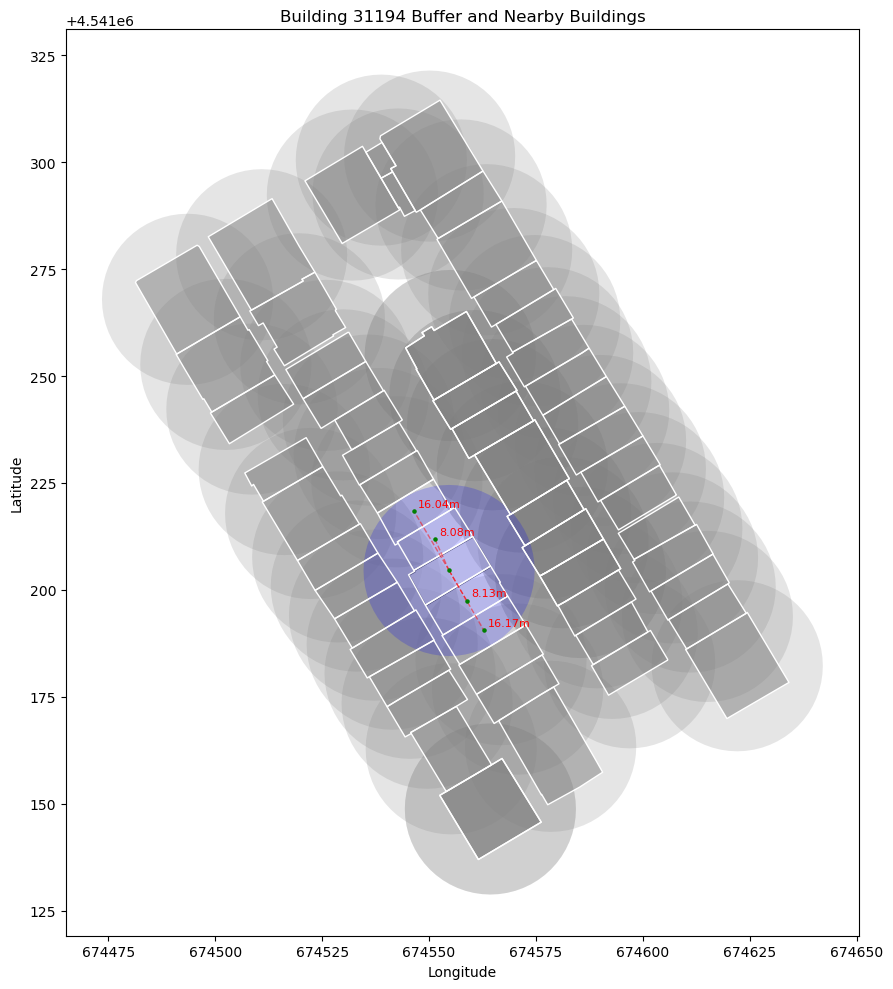

In [6]:

# building_gdf = gpd.read_file("path_to_your_file.shp")

# İlgilenilen bina ID'sini belirleyin
selected_building_id = 31194  # Örnek bir bina ID'si

# İlgilenilen binayı seçin
selected_building = building_gdf[building_gdf['OBJECTID_1'] == selected_building_id]

# Seçilen binanın buffer'ını oluşturun
buffer_distance_meters = 20  # Örnek bir buffer mesafesi
selected_building['buffer'] = selected_building['center'].buffer(buffer_distance_meters)

# Seçili binanın tampon bölgesi içinde kalan binaları seçin
buffer_polygon = selected_building['buffer'].iloc[0]
nearby_buildings = building_gdf[building_gdf['center'].apply(lambda x: x.within(buffer_polygon))]

# Seçili binanın merkezini ve buffer'ını görselleştirmek için bir altlık oluşturun
fig, ax = plt.subplots(figsize=(10, 10))

# Seçili binayı ve buffer'ını görselleştirin
selected_building.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
building_gdf.boundary.plot(ax=ax, color='white', linewidth=1, alpha=1, zorder=2)
selected_building['buffer'].plot(ax=ax, color='blue', alpha=0.2)

# Buffer'ın içindeki diğer binaların merkezlerini ve bufferlarını görselleştirin
for index, row in nearby_buildings.iterrows():
    if row['OBJECTID_1'] != selected_building_id:  # Seçili binayı atlayın
        center_point = row['center']
        distance = selected_building['center'].iloc[0].distance(center_point)
        
        # Mesafe çizgisini çizin
        ax.plot([selected_building['center'].iloc[0].x, center_point.x], [selected_building['center'].iloc[0].y, center_point.y],
                color='red', linestyle='--', linewidth=1, alpha=0.5)
        
        # Mesafeyi yazın
        ax.annotate(text=f'{distance:.2f}m', xy=(center_point.x, center_point.y), xytext=(3, 3),
                    textcoords="offset points", fontsize=8, color='red')

# Diğer zonun içine giren diğer yapıların merkezlerini ve bufferlarını görselleştirin
other_buildings = building_gdf[~building_gdf['buffer'].apply(lambda buffer: buffer.contains(selected_building['center'].iloc[0]))]
other_buildings.plot(ax=ax, color='gray', alpha=0.5, zorder=0)
other_buildings['buffer'].plot(ax=ax, color='gray', alpha=0.2, zorder=0)

# Buffer'ın içindeki diğer binaların orta noktalarını nokta olarak görselleştirin
points_gdf = gpd.GeoDataFrame(geometry=nearby_buildings['center'], crs=building_gdf.crs)
points_gdf.plot(ax=ax, color='green', markersize=5, zorder=2)

# Eksenleri ve başlıkları ayarlayın
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Building {selected_building_id} Buffer and Nearby Buildings')

# Görseli gösterin
plt.tight_layout()
plt.savefig('yapı_mesafe_örn4.png', dpi=300)  # DPI (dots per inch) can be adjusted as needed
plt.show()
